Ground State E = 138.02 eV
First excited State E = 414.07 eV
Second excited State E = 690.12 eV


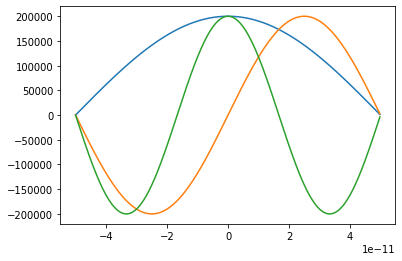

In [38]:
# Exercise 8.14a
import numpy as np
m = 9.1094e-31
hbar = 1.0546e-34
e = 1.6022e-19
a = 1e-11
L = 20*a
N = 1000
h = L/N

V0 = 50*e
def V(x):
    return V0*x**2/a**2

def f(r,x,E):
    u = r[0]
    p = r[1]
    fu = p
    fp = (2*m/hbar**2)*(V(x)-E)*u
    return np.array([fu,fp],float)
# Function to normalize the wavefunction
def normalize(u):  
    u2 = np.square(u)
    sigma = 0
    for i in range(len(u2)-1):
        sigma += (h*(u2[i]+u2[i+1])/2)
    return u/np.sqrt(sigma)
ulog1 = [] 
xlog1 = []
# Runge Kutta
def solve(E):
    u = 0.0
    p = 1.0
    r = np.array([u,p],float)
    
    for x in np.arange(-10*a,10*a,h):
        k1 = h*f(r,x,E)
        k2 = h*f(r+0.5*k1,x+0.5*h,E)
        k3 = h*f(r+0.5*k2,x+0.5*h,E)
        k4 = h*f(r+k3,x+h,E)
        r += (k1+2*k2+2*k3+k4)/6
    return r[0]
E1 = 0.0
E2 = e
psi2 = solve(E1)
target = e/1000
# Solving for the eigenvalues and normalized wavefunctions
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)
E = E2/e
print('Ground State E =', '%.2f' % E, 'eV')
for x in np.arange(-5*a, 5*a, h):
    xlog1.append(x)
    u = 200000 * np.cos((np.pi*x)/(10*a))
    ulog1.append(u)
plot(xlog1,ulog1)
E1 = E2
E2 *= 3
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)
E = E2/e
print('First excited State E =', '%.2f' % E, 'eV')
ulog2 = [] 
xlog2 = []
for x in np.arange(-5*a, 5*a, h):
    xlog2.append(x)
    u = 200000 * np.sin((2*np.pi*x)/(10*a))
    ulog2.append(u)
plot(xlog2,ulog2)

E1 = E2
E2 *= 5/3
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)
E = E2/e
print('Second excited State E =', '%.2f' % E, 'eV')
ulog3 = [] 
xlog3 = []
for x in np.arange(-5*a, 5*a, h):
    xlog3.append(x)
    u = 200000 * np.cos((3*np.pi*x)/(10*a))
    ulog3.append(u)
plot(xlog3,ulog3)
# plot(xlog2,ulog2)

Ground State E = 205.31 eV
First excited State E = 735.69 eV
Second excited State E = 1471.4 eV


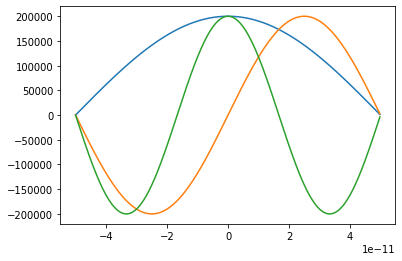

In [37]:
# Exercise 8.14b
import numpy as np
from pylab import plot
m = 9.1094e-31
hbar = 1.0546e-34
e = 1.6022e-19
a = 1e-11
L = 20*a
N = 1000
h = L/N

V0 = 50*e
def V(x):
    return V0*x**4/a**4

def f(r,x,E):
    u = r[0]
    p = r[1]
    fu = p
    fp = (2*m/hbar**2)*(V(x)-E)*u
    return np.array([fu,fp],float)
# Runge Kutta
def solve(E):
    u = 0.0
    p = 1.0
    r = np.array([u,p],float)
    for x in np.arange(-10*a,10*a,h):
        k1 = h*f(r,x,E)
        k2 = h*f(r+0.5*k1,x+0.5*h,E)
        k3 = h*f(r+0.5*k2,x+0.5*h,E)
        k4 = h*f(r+k3,x+h,E)
        r += (k1+2*k2+2*k3+k4)/6
    return r[0]
E1 = 0.0
E2 = e
psi2 = solve(E1)

target = e/1000
# Solving for the eigenvalues and normalized wavefunctions
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)
E = E2/e
print('Ground State E =', '%.2f' % E, 'eV')

E1 = 2*E2
E2 *= 3
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)
E = E2/e
print('First excited State E =', '%.2f' % E, 'eV')

E1 = 2*E2
E2 *= 2
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)
E = E2/e
print('Second excited State E =', '%.1f' % E, 'eV')
plot(xlog1,ulog1)
plot(xlog2,ulog2)
plot(xlog3,ulog3)
# The reason why there was a large value at the end of the 
# array for the u values was because the eigenvalues weren't precise enough

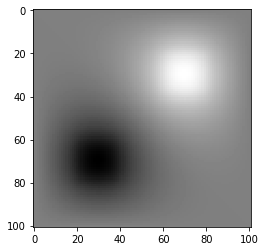

In [3]:
from numpy import empty,zeros,max
from pylab import imshow,gray,show

# Constants
M = 100         # Grid squares on a side
V = 0.0        # Voltage at top wall
target = 1e-6   # Target accuracy

# Create arrays to hold potential values
phi = zeros([M+1,M+1],float)
phi[0,:] = V
phiprime = empty([M+1,M+1],float)

rho = zeros([M+1,M+1],float)
# print(rho[60:61][20:21])
rho[60:80, 20:40] = -1
rho[20:40, 60:80] = 1

# Main loop
delta = 1.0
while delta>target:

    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = ((phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4) + (rho[i,j]/4)

    # Calculate maximum difference from old values
    delta = max(abs(phi-phiprime))

    # Swap the two arrays around
    phi,phiprime = phiprime,phi

# Make a plot
imshow(phi)
gray()
show() 

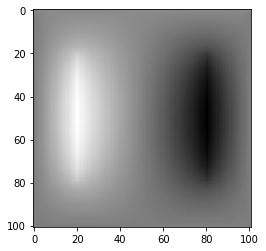

In [4]:
from numpy import empty,zeros,max
from pylab import imshow,gray,show

# Constants
M = 100         # Grid squares on a side
V = 1.0        # Voltage at top wall
target = 1e-6   # Target accuracy

# Create arrays to hold potential values
phi = zeros([M+1,M+1],float)
phi[0,:] = V
phiprime = empty([M+1,M+1],float)

rho = zeros([M+1,M+1],float)
# print(rho[60:61][20:21])
rho[20:80, 80:81] = -1
rho[20:80, 20:21] = 1

# Main loop
delta = 1.0
while delta>target:

    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = ((phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4) + (rho[i,j]/4)

    # Calculate maximum difference from old values
    delta = max(abs(phi-phiprime))

    # Swap the two arrays around
    phi,phiprime = phiprime,phi

# Make a plot
imshow(phi)
gray()
show() 